<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/AI_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=56eab23bdfeb8645599fc33e3999a2a3456b2cd8ad4236d4c46ffa44684c6758
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [4]:
pip skfuzzy


ERROR: unknown command "skfuzzy"


In [5]:
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

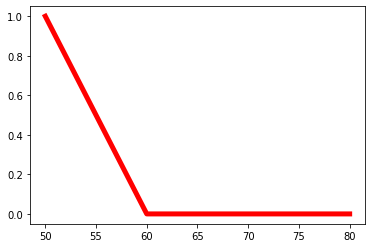

In [8]:
x= np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth = 5, label='slow')
plt.plot

In [ ]:
medium = fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth = 5, label='slow')
plt.plot

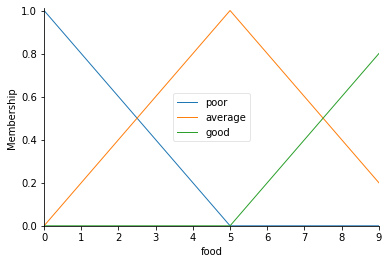

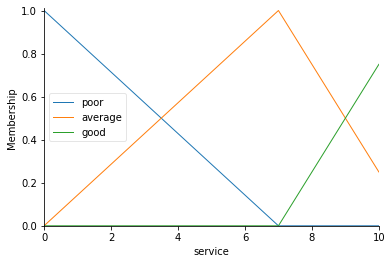

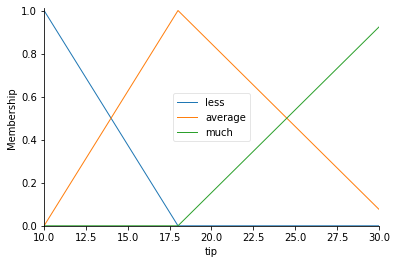

In [16]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

food = ctrl.Antecedent(np.arange(0,10,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[0,5,10])
food['good']= fuzz.trimf(food.universe,[5,10,10])

service['poor']= fuzz.trimf(service.universe,[0,0,7])
service['average']= fuzz.trimf(service.universe,[0,7,11])
service['good']= fuzz.trimf(service.universe,[7,11,11])

tip['less']= fuzz.trimf(tip.universe,[10,10,18])
tip['average']= fuzz.trimf(tip.universe,[10,18,31])
tip['much']= fuzz.trimf(tip.universe,[18,31,31])

food.view()
service.view()
tip.view()


23.346316620041602


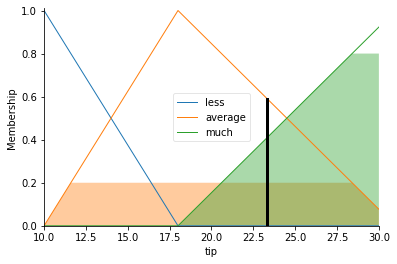

In [21]:
rule1 = ctrl.Rule(food['poor'] | service['poor'],tip['less'])
rule2 = ctrl.Rule(food['average'] & service['average'],tip['average'])
rule3 = ctrl.Rule(food['good'] | service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)
